[code]('https://www.pinecone.io/learn/series/image-search/imagenet/)

In [1]:
from datasets import load_dataset

imagenet = load_dataset(
    'Maysee/tiny-imagenet',
    split='valid',
    ignore_verifications=True  # set to True if seeing splits Error
)
imagenet


/Users/nshravanreddy/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/datasets/load.py:2555: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [2]:
imagenet[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [3]:
type(imagenet[0]['image'])

PIL.JpegImagePlugin.JpegImageFile

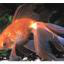

In [8]:
imagenet[0]['image']

In [9]:
imagenet[0]['label']

0

In [6]:
imagenet[0]['image'].mode,imagenet[201]['image'].mode

('RGB', 'L')

In [16]:
from tqdm.auto import tqdm
import torch
from torchvision import transforms

preprocess=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                        std=[0.229,0.224,0.225]),
])
inputs=[]
for image in tqdm(imagenet[:50]['image']):
    if image.mode!='RGB':
        image=image.convert("RGB")
    input_tensor=preprocess(image)
    inputs.append(input_tensor)

inputs=torch.stack(inputs)
inputs.size()

  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([50, 3, 224, 224])

In [17]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /Users/nshravanreddy/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/nshravanreddy/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nshravanreddy/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/nshravanreddy/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [01:06<00:00, 3.68MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
inputs=inputs.to(device)
model.to(device)

with torch.no_grad():
    output=model(inputs).detach()
print(output.shape)
print(output)

torch.Size([50, 1000])
tensor([[ 7.2008, 14.0141, -0.4883,  ...,  5.5724,  1.0935, -5.2350],
        [ 3.2615,  9.6214,  1.8129,  ..., -1.4830,  0.0919, -1.8151],
        [ 6.8251, 15.3777,  1.0032,  ...,  2.2704,  0.9593, -3.7721],
        ...,
        [ 3.5202, 10.5097, -3.0180,  ...,  2.2333,  0.5606, -2.0211],
        [ 3.6958, 13.0405,  0.9107,  ..., -1.4827,  2.8325, -5.1292],
        [ 3.4574,  8.3314, -2.0551,  ...,  1.7834,  1.5504, -3.1021]],
       device='mps:0')


In [22]:
preds=torch.argmax(output,dim=1).cpu().numpy()
print(preds.shape)
preds

(50,)


array([  1,   1,   1,   1, 392,   1, 392,   1, 392,   1,   1,   1, 782,
         1, 392,  73, 392,   1,  29, 750, 392,  73, 738,   1,   1,   1,
         1, 491,   1,   1,   1,  98,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [25]:
import requests

res = requests.get("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt")


In [26]:
pred_labels = res.text.split('\n')
print(f"{len(pred_labels)}\n{pred_labels[1]}")


1000
goldfish


In [27]:
sum(preds == 1) / len(preds)


0.72